In [76]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [11]:
data = boston["data"]
data.shape

(506, 13)

In [13]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [17]:
target = boston['target']

In [22]:
X = pd.DataFrame(data, columns = feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [26]:
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [27]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [28]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(X_test)
y_pred.shape

(152, 1)

In [40]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})
check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [44]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [49]:
print(round(r2(y_test, y_pred), 2))

0.71


In [50]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [55]:
model = RandomForestRegressor(criterion='mse',
                                 max_depth=12, # глубина дерева  
                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42, 
                                 n_estimators=1000  # кол-во деревьев
                                 )

model.fit(X_train, y_train.values[:, 0])
y_train_preds = model.predict(X_train)
#print(round(r2(y_test, y_train_preds), 2))

In [58]:
print(round(r2(y_train, y_train_preds), 2))

0.76


In [ ]:
# Cудя по метрике R2  - модель RandomForestRegressor лучше

In [60]:
?RandomForestRegressor

In [73]:
importance = model.feature_importances_

In [74]:
type(importance)

numpy.ndarray

In [97]:
importance_graf = pd.Series(importance, index=feature_names)


In [98]:
print(importance_graf)

CRIM       0.010135
ZN         0.000000
INDUS      0.000076
CHAS       0.000000
NOX        0.001949
RM         0.435824
AGE        0.000185
DIS        0.014146
RAD        0.000182
TAX        0.000436
PTRATIO    0.002785
B          0.000593
LSTAT      0.533689
dtype: float64


<AxesSubplot:>

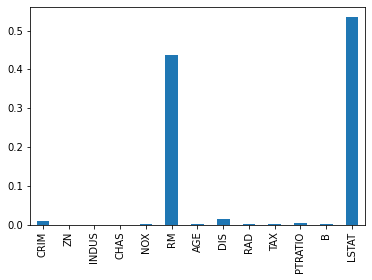

In [100]:
importance_graf.plot(kind="bar")

In [101]:
sum(importance_graf)

1.0